In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings; warnings.simplefilter('ignore')  
# will throw warning: "Palette images with Transparency expressed in bytes should be converted to RGBA images"

In [ ]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai
!pip install fastai --upgrade

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path = Path('artstyles')
classes = ['minimalism','cubisum','realisum', 'pop_art', 'impressionisum']

In [4]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

minimalism


cubisum


realisum


pop_art


impressionisum


In [17]:
np.random.seed(42)
path = Path('artstyles')
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

#padding_mode = 'zeros', or padding_mode = 'border', will make data NoneType

In [18]:
data.classes

['cubisum', 'impressionisum', 'minimalism', 'pop_art', 'realisum']

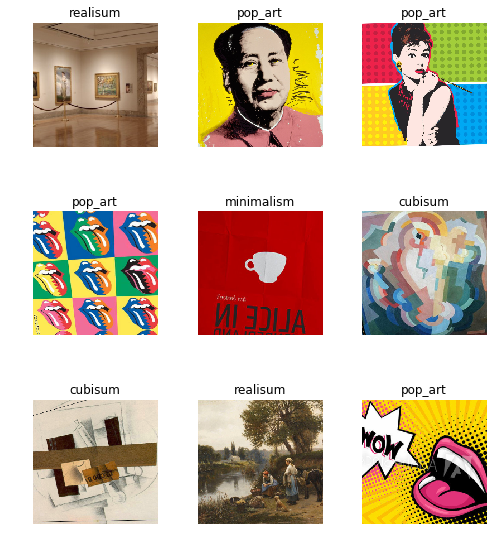

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [20]:
learn.fit_one_cycle(1)

Total time: 00:57
epoch  train_loss  valid_loss  accuracy
1      1.037300    0.775700    0.701375  (00:57)



In [21]:
learn.save('stage-1')

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


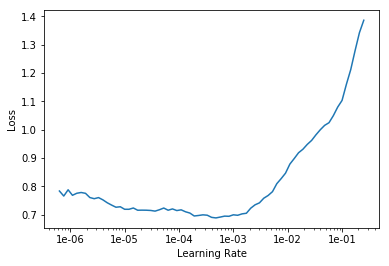

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(1, max_lr=slice(1e-4,1e-3))

Total time: 00:47
epoch  train_loss  valid_loss  accuracy
1      0.760239    0.803050    0.715128  (00:47)



In [26]:
learn.save('stage-2')

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

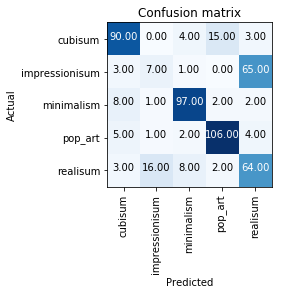

In [28]:
interp.plot_confusion_matrix()

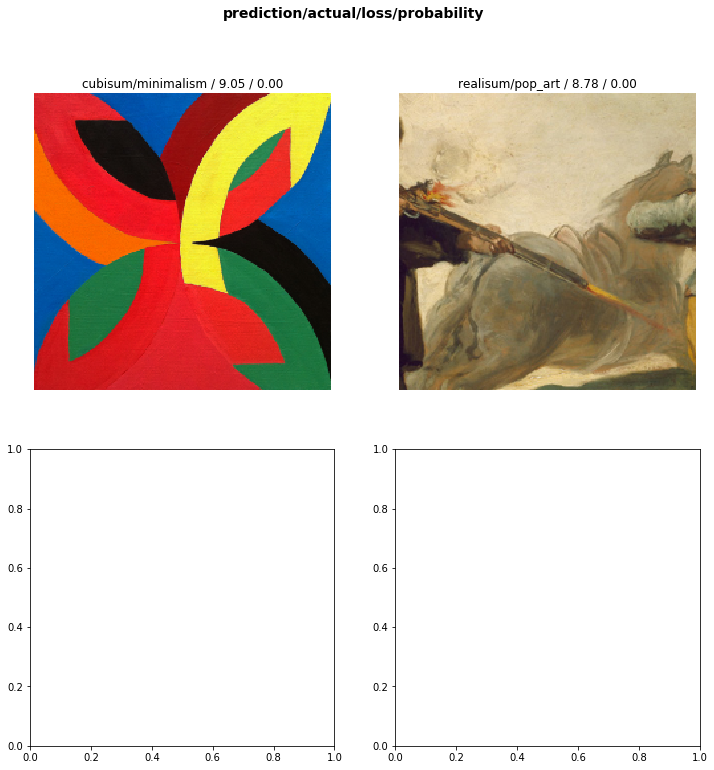

In [31]:
interp.plot_top_losses(2)

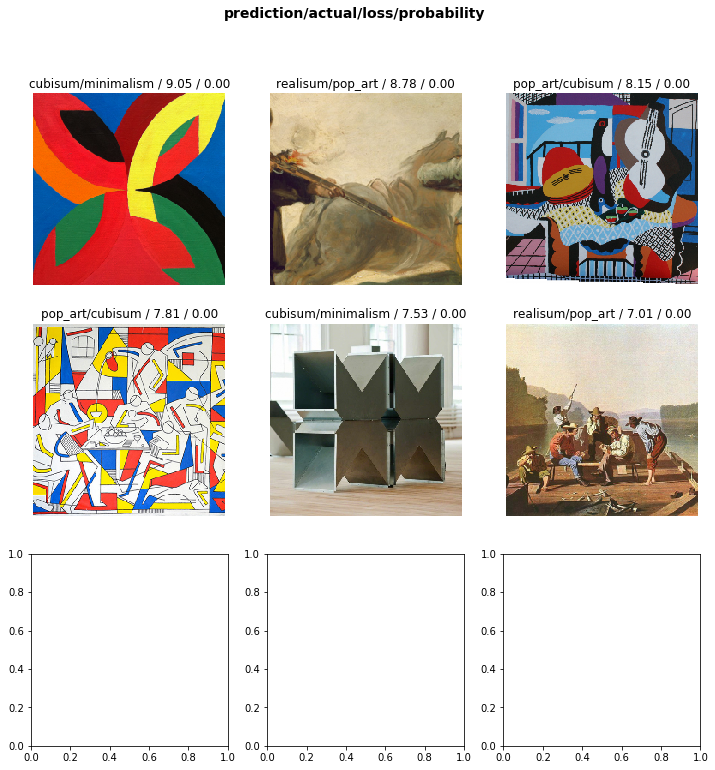

In [32]:
interp.plot_top_losses(6)